<a href="https://colab.research.google.com/github/DevNicque/MyCods/blob/master/FFR_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configurações

In [1]:
#EDA
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#Evaluate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split


#LightGBM
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

#Data Acquisition
from google.cloud import bigquery
import warnings
from datetime import datetime

import math


In [3]:
from google.colab import syntax

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = 'drive/MyDrive/'

In [7]:
ffr = pd.read_csv(path + 'ffr.csv')
ffr

,Unnamed: 0,ProductName,WorkOrderCanceled,WorkOrderRur,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,...,ProblemGroup,FailureMonth,FailureYear,FailurePeriod,TotalFalhas,Period_x,TotalProduzido,Period_y,TotalAtivado,Period
0,0,ARUBA21,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,Antenna,9,2021,2021-09-01,1,09-2021,161388.0,2021-09-01,NaN,NaN
1,1,ARUBA21,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,Power on/off,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,NaN,NaN
2,2,ARUBA21,False,True,NaN,NaN,NaN,NaN,NaN,NaN,...,Software,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,NaN,NaN
3,3,ARUBA21,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,Others,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,NaN,NaN
4,4,ARUBA21,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,Camera,10,2021,2021-10-01,1,10-2021,293940.0,2021-10-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,5757,TAHOE21,False,False,LTPS IPS LCD,6.7,1080x2520,SIM,409.0,DEZESSEIS MILHOES,...,Charging,11,2022,2022-11-01,3,11-2022,NaN,NaN,1790360.0,2022-11-01
5758,5758,TAHOE21,False,False,LTPS IPS LCD,6.7,1080x2520,SIM,409.0,DEZESSEIS MILHOES,...,Charging,11,2022,2022-11-01,3,11-2022,NaN,NaN,1100821.0,2022-11-01
5759,5759,TAHOE21,False,False,LTPS IPS LCD,6.7,1080x2520,SIM,409.0,DEZESSEIS MILHOES,...,Charging,11,2022,2022-11-01,3,11-2022,NaN,NaN,1384663.0,2022-11-01
5760,5760,TAHOE21,False,False,LTPS IPS LCD,6.7,1080x2520,SIM,409.0,DEZESSEIS MILHOES,...,Charging,11,2022,2022-11-01,3,11-2022,NaN,NaN,2207447.0,2022-11-01


## 2. Data Acquisition

In [2]:
project_id = 'dataservices-non-prod'

In [5]:
query = syntax.sql(
    '''
    select * from `Smart_Factory_AI.temp_ffr`  prod
      '''
)
ffr = pd.io.gbq.read_gbq(query, project_id=project_id, dialect='standard')
ffr

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=dHA1MBqtfbDIphqxzDB2bGIFkkAuYz&prompt=consent&access_type=offline
Enter the authorization code: 4/1AfgeXvtkHuT63rZzGBP0HO7uiFQGKXzz7zp8ppHd-_6lfO-F3tsEcCgMwBw


,ProductName,WorkOrderCanceled,WorkOrderRur,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,DisplayVidroResistente,...,SoftwareLinguagemWeb,SoftwareTalkBack,SoftwareVersaoKernel,SoftwareAtualizacaoFirmware,ProblemGroup,FailureMonth,FailureYear,FailurePeriod,Period,TotalFalhas
0,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Display,04,2020,2020-04-01 00:00:00,NaT,1
1,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Camera,12,2020,2020-12-01 00:00:00,2020-12-01 00:00:00,2
2,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Others,12,2020,2020-12-01 00:00:00,2020-12-01 00:00:00,1
3,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Power on/off,12,2020,2020-12-01 00:00:00,2020-12-01 00:00:00,2
4,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Charging,12,2020,2020-12-01 00:00:00,2020-12-01 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Others,11,2022,2022-11-01 00:00:00,2022-11-01 00:00:00,4
398,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Display,11,2022,2022-11-01 00:00:00,2022-11-01 00:00:00,4
399,CEBU20,False,True,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Display,11,2022,2022-11-01 00:00:00,2022-11-01 00:00:00,1
400,CEBU20,False,False,TFT LCD IPS,6.8,720x1640,SIM,263,DEZESSEIS MILHOES,NAO,...,"HTML, XHTML, HTML5",Sim,4.19.157,Não,Camera,11,2022,2022-11-01 00:00:00,2022-11-01 00:00:00,1


## 3. Data Selection

In [16]:
df = ffr.copy()
pd.set_option('display.max_columns', None)
df = df.fillna(0)
df.head(5)

,Unnamed: 0,ProductName,WorkOrderCanceled,WorkOrderRur,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,DisplayVidroResistente,DisplayRecursosDisplay,DisplayRelacaoTelaCorpo,BatteryCarregador,CameraLocal_1,CameraResolucao_1,CameraAbertura_1,CameraTamanhoPixel_1,CameraFoco_1,CameraTipo_1,CameraTamanhoLente_1,CameraTamanhoSensor_1,CameraVideoResolucao_1,CameraVideoFps_1,CameraHDR_1,CameraLedFlash_1,CameraLocal_2,CameraResolucao_2,CameraAbertura_2,CameraTamanhoPixel_2,CameraFoco_2,CameraTipo_2,CameraTamanhoLente_2,CameraTamanhoSensor_2,CameraVideoResolucao_2,CameraVideoFps_2,CameraHDR_2,CameraLedFlash_2,CameraLocal_3,CameraResolucao_3,CameraAbertura_3,CameraTamanhoPixel_3,CameraFoco_3,CameraTipo_3,CameraTamanhoLente_3,CameraTamanhoSensor_3,CameraVideoResolucao_3,CameraVideoFps_3,CameraHDR_3,CameraLedFlash_3,CameraLocal_4,CameraResolucao_4,CameraAbertura_4,CameraTamanhoPixel_4,CameraFoco_4,CameraTipo_4,CameraTamanhoLente_4,CameraTamanhoSensor_4,CameraVideoResolucao_4,CameraVideoFps_4,CameraHDR_4,CameraLedFlash_4,CameraLocal_5,CameraResolucao_5,CameraAbertura_5,CameraTamanhoPixel_5,CameraFoco_5,CameraTipo_5,CameraTamanhoLente_5,CameraTamanhoSensor_5,CameraVideoResolucao_5,CameraVideoFps_5,CameraHDR_5,CameraLedFlash_5,CameraLocal_6,CameraResolucao_6,CameraAbertura_6,CameraTamanhoPixel_6,CameraFoco_6,CameraTipo_6,CameraTamanhoLente_6,CameraTamanhoSensor_6,CameraVideoResolucao_6,CameraVideoFps_6,CameraHDR_6,CameraLedFlash_6,AntenaTipo,AntenaRadio,AntenaTV,AudioVivaVoz,AudioRedutorDeRuido,AudioSaidaJack,AudioFormatoDeAudioMP3,AudioFormatoDeAudioWAV,AudioFormatoDeAudioWMA,AudioFormatoDeAudioEAAC,AudioFormatoDeAudioFLAC,BluetoothVersao,BluetoothTipoLE,BluetoothTipoA2DP,PowerOnOffHardReset,PowerOnOffBotalDigital,PowerOnOffLigarPorCarregador,SimCardSingle,SimCardTamanhoSingle,SimCardDualSim,SimCardTamanhoDualSim,SimCardTipoDualSim,SoftwareSistemaOperacional,SoftwareLinguagemWeb,SoftwareTalkBack,SoftwareVersaoKernel,SoftwareAtualizacaoFirmware,ProblemGroup,FailureMonth,FailureYear,FailurePeriod,TotalFalhas,Period_x,TotalProduzido,Period_y,TotalAtivado,Period
0,0,ARUBA21,False,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Antenna,9,2021,2021-09-01,1,09-2021,161388.0,2021-09-01,0.0,0
1,1,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Power on/off,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0
2,2,ARUBA21,False,True,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Software,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0
3,3,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Others,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0
4,4,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Camera,10,2021,2021-10-01,1,10-2021,293940.0,202

In [17]:
df.describe()

,Unnamed: 0,DisplayTamanho,DisplayDensidadePixel,DisplayRelacaoTelaCorpo,BatteryCarregador,CameraResolucao_1,CameraAbertura_1,CameraTamanhoPixel_1,CameraFoco_1,CameraTamanhoLente_1,CameraVideoFps_1,CameraResolucao_2,CameraAbertura_2,CameraTamanhoPixel_2,CameraTamanhoLente_2,CameraResolucao_3,CameraAbertura_3,CameraTamanhoPixel_3,CameraTamanhoLente_3,CameraResolucao_4,CameraAbertura_4,CameraTamanhoPixel_4,CameraTamanhoLente_4,CameraTamanhoSensor_4,CameraResolucao_5,CameraAbertura_5,CameraTamanhoPixel_5,CameraFoco_5,CameraTamanhoLente_5,CameraTamanhoSensor_5,CameraResolucao_6,CameraAbertura_6,CameraTamanhoPixel_6,CameraFoco_6,CameraTamanhoLente_6,CameraTamanhoSensor_6,BluetoothVersao,FailureMonth,FailureYear,TotalFalhas,TotalProduzido,TotalAtivado
count,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.0,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.0,5762.000000,5762.000000,5762.000000,5762.0,5762.0,5762.000000,5762.000000,5762.000000,5762.0,5762.0,5762.0,5762.0,5762.0,5762.0,5762.0,5762.0,5762.0,5762.000000,5762.000000,5762.000000,5762.000000,5.762000e+03,5.762000e+03
mean,2880.500000,6.309754,318.838771,79.332888,14.530545,11.649948,2.098438,1.006567,0.0,6.231690,28.615064,27.897431,1.958955,0.912423,10.843110,30.261020,1.952239,1.000240,0.0,7.696980,1.671642,0.828575,0.0,0.0,1.144741,1.373690,1.001649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.813676,6.822978,2021.545297,39.025165,4.113854e+05,4.159848e+05
std,1663.490457,1.392351,97.891981,17.499796,6.805314,5.039282,0.461691,0.229038,0.0,11.176851,6.295785,22.934517,0.539301,0.265147,12.820934,30.278117,0.537220,0.577105,0.0,7.472392,1.010910,0.655596,0.0,0.0,0.989555,1.187466,0.865861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.060208,3.233209,0.542689,98.285586,6.318582e+05,6.257038e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,2017.000000,1.000000,0.000000e+00,0.000000e+00
25%,1440.250000,6.500000,270.000000,81.500000,10.000000,8.000000,2.200000,1.000000,0.0,0.000000,30.000000,8.000000,1.700000,0.800000,0.000000,2.000000,1.700000,0.700000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,4.000000,2021.000000,2.000000,0.000000e+00,0.000000e+00
50%,2880.500000,6.700000,270.000000,84.200000,20.000000,16.000000,2.200000,1.000000,0.0,0.000000,30.000000,13.000000,2.000000,1.120000,0.000000,8.000000,2.200000,0.700000,0.0,2.000000,2.200000,1.000000,0.0,0.0,2.000000,2.400000,1.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,7.000000,2022.000000,7.000000,5.909200e+04,0.000000e+00
75%,4320.750000,6.700000,409.000000,84.200000,20.000000,16.000000,2.200000,1.120000,0.0,0.000000,30.000000,48.000000,2.400000,1.120000,26.000000,64.000000,2.400000,1.750000,0.0,16.000000,2.400000,1.000000,0.0,0.0,2.000000,2.400000,1.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000,10.000000,2022.000000,31.000000,7.967040e+05,8.692970e+05
max,5761.000000,6.800000,409.000000,85.000000,20.000000,16.000000,2.200000,1.120000,0.0,27.000000,30.000000,64.000000,2.400000,1.120000,26.000000,64.000000,2.400000,1.750000,0.0,16.000000,2.400000,1.750000,0.0,0.0,2.000000,2.400000,1.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000,12.000000,2022.000000,1446.000000,2.262431e+06,2.207447e+06


In [21]:
df[df.columns[0:90]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5762 non-null   int64  
 1   ProductName              5762 non-null   object 
 2   WorkOrderCanceled        5762 non-null   bool   
 3   WorkOrderRur             5762 non-null   bool   
 4   DisplayTipo              5762 non-null   object 
 5   DisplayTamanho           5762 non-null   float64
 6   DisplayResolucao         5762 non-null   object 
 7   DisplayTouchScreen       5762 non-null   object 
 8   DisplayDensidadePixel    5762 non-null   float64
 9   DisplayCores             5762 non-null   object 
 10  DisplayVidroResistente   5762 non-null   object 
 11  DisplayRecursosDisplay   5762 non-null   object 
 12  DisplayRelacaoTelaCorpo  5762 non-null   float64
 13  BatteryCarregador        5762 non-null   float64
 14  CameraLocal_1           

In [22]:
df[df.columns[90:123]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AudioRedutorDeRuido           5762 non-null   object 
 1   AudioSaidaJack                5762 non-null   object 
 2   AudioFormatoDeAudioMP3        5762 non-null   object 
 3   AudioFormatoDeAudioWAV        5762 non-null   object 
 4   AudioFormatoDeAudioWMA        5762 non-null   object 
 5   AudioFormatoDeAudioEAAC       5762 non-null   object 
 6   AudioFormatoDeAudioFLAC       5762 non-null   object 
 7   BluetoothVersao               5762 non-null   float64
 8   BluetoothTipoLE               5762 non-null   object 
 9   BluetoothTipoA2DP             5762 non-null   object 
 10  PowerOnOffHardReset           5762 non-null   object 
 11  PowerOnOffBotalDigital        5762 non-null   object 
 12  PowerOnOffLigarPorCarregador  5762 non-null   object 
 13  Sim

In [18]:
# plt graphics configuration
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 22

In [ ]:
ax = sns.countplot(x='ProductName', data=df)
plt.xticks(rotation=90)

Atual

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

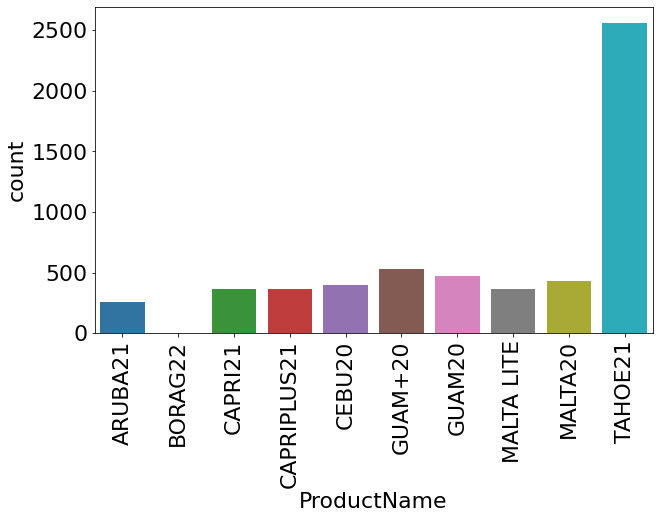

In [19]:
ax = sns.countplot(x='ProductName', data=df)
plt.xticks(rotation=90)

ANTERIOR

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

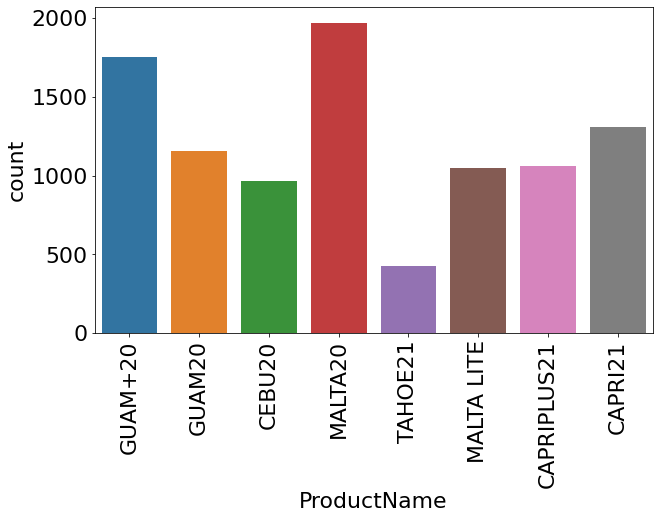

In [ ]:
ax = sns.countplot(x='ProductName', data=df)
plt.xticks(rotation=90)

ATUAL

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

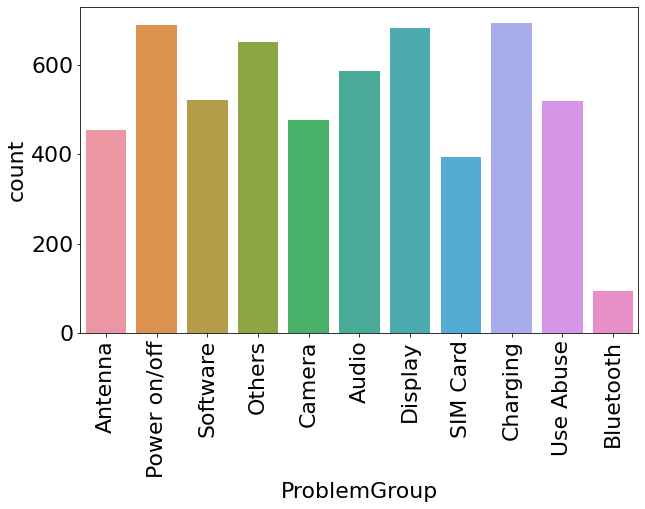

In [20]:
ax = sns.countplot(x='ProblemGroup', data=df)
plt.xticks(rotation=90)

ANTERIOR

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

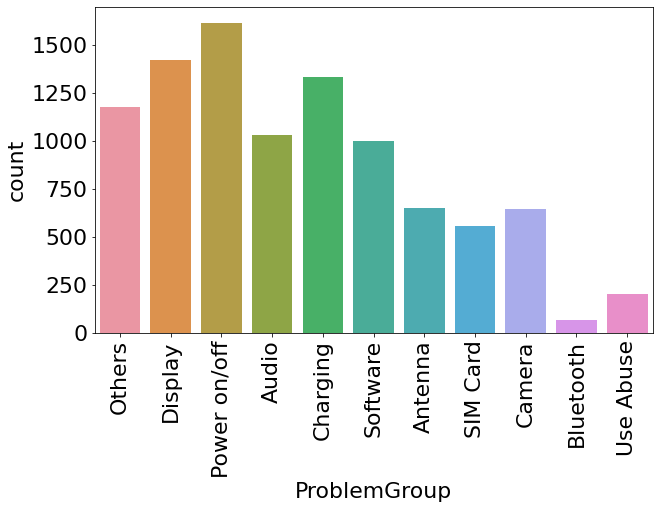

In [ ]:
ax = sns.countplot(x='ProblemGroup', data=df)
plt.xticks(rotation=90)

## 4. Data Preparation

In [ ]:
df['PercentualFalhas'] = (df.TotalFalhas / df.TotalAtivado) * 100
df['PercentualFalhas'] = df['PercentualFalhas'].apply(lambda x : round(x,2))
df.head(11)

,Unnamed: 0,ProductName,WorkOrderCanceled,WorkOrderRur,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,DisplayVidroResistente,DisplayRecursosDisplay,DisplayRelacaoTelaCorpo,BatteryCarregador,CameraLocal_1,CameraResolucao_1,CameraAbertura_1,CameraTamanhoPixel_1,CameraFoco_1,CameraTipo_1,CameraTamanhoLente_1,CameraTamanhoSensor_1,CameraVideoResolucao_1,CameraVideoFps_1,CameraHDR_1,CameraLedFlash_1,CameraLocal_2,CameraResolucao_2,CameraAbertura_2,CameraTamanhoPixel_2,CameraFoco_2,CameraTipo_2,CameraTamanhoLente_2,CameraTamanhoSensor_2,CameraVideoResolucao_2,CameraVideoFps_2,CameraHDR_2,CameraLedFlash_2,CameraLocal_3,CameraResolucao_3,CameraAbertura_3,CameraTamanhoPixel_3,CameraFoco_3,CameraTipo_3,CameraTamanhoLente_3,CameraTamanhoSensor_3,CameraVideoResolucao_3,CameraVideoFps_3,CameraHDR_3,CameraLedFlash_3,CameraLocal_4,CameraResolucao_4,CameraAbertura_4,CameraTamanhoPixel_4,CameraFoco_4,CameraTipo_4,CameraTamanhoLente_4,CameraTamanhoSensor_4,CameraVideoResolucao_4,CameraVideoFps_4,CameraHDR_4,CameraLedFlash_4,CameraLocal_5,CameraResolucao_5,CameraAbertura_5,CameraTamanhoPixel_5,CameraFoco_5,CameraTipo_5,CameraTamanhoLente_5,CameraTamanhoSensor_5,CameraVideoResolucao_5,CameraVideoFps_5,CameraHDR_5,CameraLedFlash_5,CameraLocal_6,CameraResolucao_6,CameraAbertura_6,CameraTamanhoPixel_6,CameraFoco_6,CameraTipo_6,CameraTamanhoLente_6,CameraTamanhoSensor_6,CameraVideoResolucao_6,CameraVideoFps_6,CameraHDR_6,CameraLedFlash_6,AntenaTipo,AntenaRadio,AntenaTV,AudioVivaVoz,AudioRedutorDeRuido,AudioSaidaJack,AudioFormatoDeAudioMP3,AudioFormatoDeAudioWAV,AudioFormatoDeAudioWMA,AudioFormatoDeAudioEAAC,AudioFormatoDeAudioFLAC,BluetoothVersao,BluetoothTipoLE,BluetoothTipoA2DP,PowerOnOffHardReset,PowerOnOffBotalDigital,PowerOnOffLigarPorCarregador,SimCardSingle,SimCardTamanhoSingle,SimCardDualSim,SimCardTamanhoDualSim,SimCardTipoDualSim,SoftwareSistemaOperacional,SoftwareLinguagemWeb,SoftwareTalkBack,SoftwareVersaoKernel,SoftwareAtualizacaoFirmware,ProblemGroup,FailureMonth,FailureYear,FailurePeriod,TotalFalhas,Period_x,TotalProduzido,Period_y,TotalAtivado,Period,PercentualFalhas
0,0,ARUBA21,False,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Antenna,9,2021,2021-09-01,1,09-2021,161388.0,2021-09-01,0.0,0,inf
1,1,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Power on/off,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
2,2,ARUBA21,False,True,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Software,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
3,3,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Others,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
4,4,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Camera,10,2021,

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

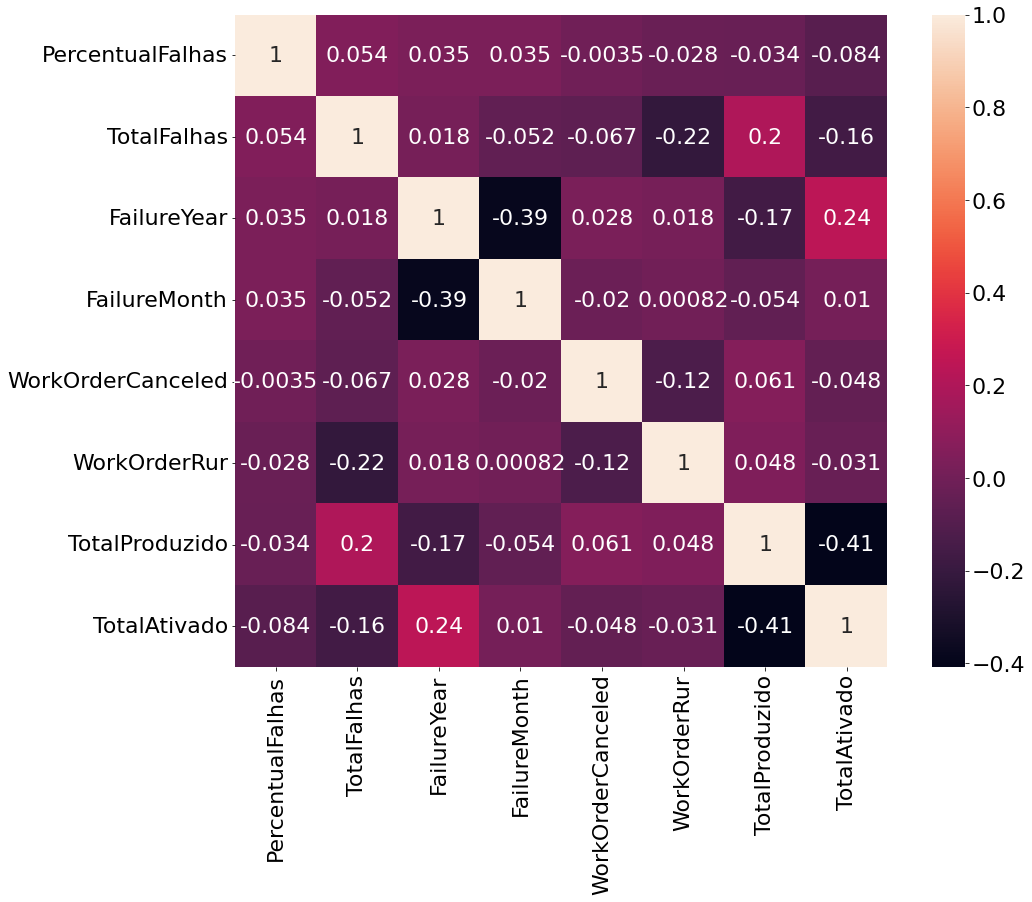

In [ ]:
plt.figure(figsize=(16,12))
correlacao = df.corr()
corr_cols = correlacao.nlargest(30,'PercentualFalhas')['PercentualFalhas']
sns.heatmap(df[corr_cols.index].corr(), annot=True, square=True)

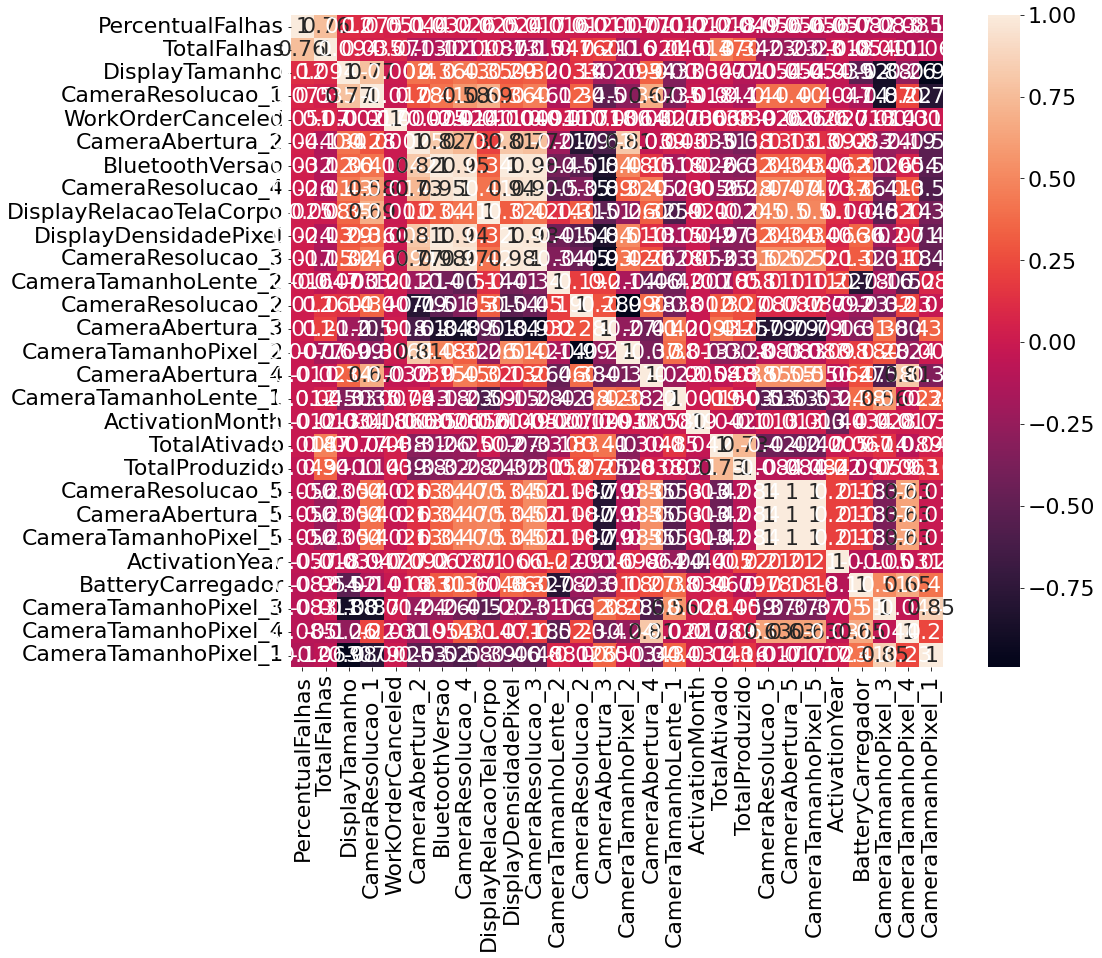

In [ ]:
plt.figure(figsize=(16,12))
correlacao = df.corr()
corr_cols = correlacao.nlargest(30,'PercentualFalhas')['PercentualFalhas']
sns.heatmap(df[corr_cols.index].corr(), annot=True, square=True)

In [ ]:
#correlacao = df.corr()
correlacao.sort_values(["PercentualFalhas"], ascending = False, inplace = True)
print(correlacao.PercentualFalhas)

PercentualFalhas           1.000000
TotalFalhas                0.053897
FailureYear                0.035262
FailureMonth               0.035112
WorkOrderCanceled         -0.003472
WorkOrderRur              -0.027833
TotalProduzido            -0.033848
TotalAtivado              -0.084318
DisplayTamanho                  NaN
DisplayDensidadePixel           NaN
DisplayRelacaoTelaCorpo         NaN
BatteryCarregador               NaN
CameraResolucao_1               NaN
CameraAbertura_1                NaN
CameraTamanhoPixel_1            NaN
CameraFoco_1                    NaN
CameraTamanhoLente_1            NaN
CameraVideoFps_1                NaN
CameraResolucao_2               NaN
CameraAbertura_2                NaN
CameraTamanhoPixel_2            NaN
CameraTamanhoLente_2            NaN
CameraResolucao_3               NaN
CameraAbertura_3                NaN
CameraTamanhoPixel_3            NaN
CameraTamanhoLente_3            NaN
CameraResolucao_4               NaN
CameraAbertura_4            

In [ ]:
df.isna().sum()

ProductName          0
WorkOrderCanceled    0
WorkOrderRur         0
DisplayTipo          0
DisplayTamanho       0
                    ..
TotalProduzido       0
Period_y             0
TotalAtivado         0
Period               0
PercentualFalhas     0
Length: 123, dtype: int64

In [ ]:
df.isnull().sum()

ProductName          0
WorkOrderCanceled    0
WorkOrderRur         0
DisplayTipo          0
DisplayTamanho       0
                    ..
TotalProduzido       0
Period_y             0
TotalAtivado         0
Period               0
PercentualFalhas     0
Length: 123, dtype: int64

In [ ]:
d = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
df = df.astype(d)
print (df.dtypes)

ProductName           object
WorkOrderCanceled       bool
WorkOrderRur            bool
DisplayTipo           object
DisplayTamanho       float64
                      ...   
TotalProduzido       float64
Period_y              object
TotalAtivado         float64
Period                object
PercentualFalhas     float64
Length: 123, dtype: object


In [ ]:

df['PercentualFalhas'] = df['PercentualFalhas'].apply(lambda x: float(x))


### Label Encoder 

In [ ]:
'''features_to_encode = ['ProductName' ,'ManufacturingCountry','SegmentCode','Memory','SoftwareVersion','WorkOrderCanceled','WorkOrderRur',
                    'ProblemGroup','DisplayTipo', 'DisplayTamanho','DisplayResolucao','DisplayTouchScreen','DisplayDensidadePixel','DisplayCores','DisplayVidroResistente',
                    'DisplayRecursosDisplay','DisplayRelacaoTelaCorpo','BatteryCarregador','CameraLocal_1','CameraResolucao_1','CameraAbertura_1',
                    'CameraTamanhoPixel_1','CameraFoco_1','CameraTipo_1','CameraTamanhoLente_1','CameraTamanhoSensor_1','CameraVideoResolucao_1','CameraVideoFps_1','CameraHDR_1',
                    'CameraLedFlash_1','CameraLocal_2','CameraResolucao_2','CameraAbertura_2','CameraTamanhoPixel_2','CameraFoco_2','CameraTipo_2','CameraTamanhoLente_2',
                    'CameraTamanhoSensor_2','CameraVideoResolucao_2','CameraVideoFps_2','CameraHDR_2','CameraLedFlash_2','CameraLocal_3','CameraResolucao_3','CameraAbertura_3',
                    'CameraTamanhoPixel_3','CameraFoco_3','CameraTipo_3','CameraTamanhoLente_3','CameraTamanhoSensor_3','CameraVideoResolucao_3','CameraVideoFps_3','CameraHDR_3',
                    'CameraLedFlash_3','CameraLocal_4','CameraResolucao_4','CameraAbertura_4','CameraTamanhoPixel_4','CameraFoco_4','CameraTipo_4','CameraTamanhoLente_4',
                    'CameraTamanhoSensor_4','CameraVideoResolucao_4','CameraVideoFps_4','CameraHDR_4','CameraLedFlash_4','CameraLocal_5','CameraResolucao_5','CameraAbertura_5',
                    'CameraTamanhoPixel_5','CameraFoco_5','CameraTipo_5','CameraTamanhoLente_5','CameraTamanhoSensor_5','CameraVideoResolucao_5','CameraVideoFps_5','CameraHDR_5',
                    'CameraLedFlash_5','CameraLocal_6','CameraResolucao_6','CameraAbertura_6','CameraTamanhoPixel_6','CameraFoco_6','CameraTipo_6','CameraTamanhoLente_6',
                    'CameraTamanhoSensor_6','CameraVideoResolucao_6','CameraVideoFps_6','CameraHDR_6','CameraLedFlash_6','AntenaTipo','AntenaRadio','AntenaTV','AudioVivaVoz',
                    'AudioRedutorDeRuido','AudioSaidaJack','AudioFormatoDeAudioMP3','AudioFormatoDeAudioWAV','AudioFormatoDeAudioWMA','AudioFormatoDeAudioEAAC',
                    'AudioFormatoDeAudioFLAC','BluetoothVersao','BluetoothTipoLE','BluetoothTipoA2DP','PowerOnOffHardReset','PowerOnOffBotalDigital','PowerOnOffLigarPorCarregador',
                    'SimCardSingle','SimCardTamanhoSingle','SimCardDualSim','SimCardTamanhoDualSim','SimCardTipoDualSim','SoftwareSistemaOperacional','SoftwareLinguagemWeb',
                    'SoftwareTalkBack','SoftwareVersaoKernel','SoftwareAtualizacaoFirmware']
le = LabelEncoder()
df[features_to_encode] = df[features_to_encode].apply(le.fit_transform)
df.head()'''

"features_to_encode = ['ProductName' ,'ManufacturingCountry','SegmentCode','Memory','SoftwareVersion','WorkOrderCanceled','WorkOrderRur',\n                    'ProblemGroup','DisplayTipo', 'DisplayTamanho','DisplayResolucao','DisplayTouchScreen','DisplayDensidadePixel','DisplayCores','DisplayVidroResistente',\n                    'DisplayRecursosDisplay','DisplayRelacaoTelaCorpo','BatteryCarregador','CameraLocal_1','CameraResolucao_1','CameraAbertura_1',\n                    'CameraTamanhoPixel_1','CameraFoco_1','CameraTipo_1','CameraTamanhoLente_1','CameraTamanhoSensor_1','CameraVideoResolucao_1','CameraVideoFps_1','CameraHDR_1',\n                    'CameraLedFlash_1','CameraLocal_2','CameraResolucao_2','CameraAbertura_2','CameraTamanhoPixel_2','CameraFoco_2','CameraTipo_2','CameraTamanhoLente_2',\n                    'CameraTamanhoSensor_2','CameraVideoResolucao_2','CameraVideoFps_2','CameraHDR_2','CameraLedFlash_2','CameraLocal_3','CameraResolucao_3','CameraAbertura_3',\n          

In [ ]:
df

,ProductName,WorkOrderCanceled,WorkOrderRur,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,DisplayVidroResistente,DisplayRecursosDisplay,DisplayRelacaoTelaCorpo,BatteryCarregador,CameraLocal_1,CameraResolucao_1,CameraAbertura_1,CameraTamanhoPixel_1,CameraFoco_1,CameraTipo_1,CameraTamanhoLente_1,CameraTamanhoSensor_1,CameraVideoResolucao_1,CameraVideoFps_1,CameraHDR_1,CameraLedFlash_1,CameraLocal_2,CameraResolucao_2,CameraAbertura_2,CameraTamanhoPixel_2,CameraFoco_2,CameraTipo_2,CameraTamanhoLente_2,CameraTamanhoSensor_2,CameraVideoResolucao_2,CameraVideoFps_2,CameraHDR_2,CameraLedFlash_2,CameraLocal_3,CameraResolucao_3,CameraAbertura_3,CameraTamanhoPixel_3,CameraFoco_3,CameraTipo_3,CameraTamanhoLente_3,CameraTamanhoSensor_3,CameraVideoResolucao_3,CameraVideoFps_3,CameraHDR_3,CameraLedFlash_3,CameraLocal_4,CameraResolucao_4,CameraAbertura_4,CameraTamanhoPixel_4,CameraFoco_4,CameraTipo_4,CameraTamanhoLente_4,CameraTamanhoSensor_4,CameraVideoResolucao_4,CameraVideoFps_4,CameraHDR_4,CameraLedFlash_4,CameraLocal_5,CameraResolucao_5,CameraAbertura_5,CameraTamanhoPixel_5,CameraFoco_5,CameraTipo_5,CameraTamanhoLente_5,CameraTamanhoSensor_5,CameraVideoResolucao_5,CameraVideoFps_5,CameraHDR_5,CameraLedFlash_5,CameraLocal_6,CameraResolucao_6,CameraAbertura_6,CameraTamanhoPixel_6,CameraFoco_6,CameraTipo_6,CameraTamanhoLente_6,CameraTamanhoSensor_6,CameraVideoResolucao_6,CameraVideoFps_6,CameraHDR_6,CameraLedFlash_6,AntenaTipo,AntenaRadio,AntenaTV,AudioVivaVoz,AudioRedutorDeRuido,AudioSaidaJack,AudioFormatoDeAudioMP3,AudioFormatoDeAudioWAV,AudioFormatoDeAudioWMA,AudioFormatoDeAudioEAAC,AudioFormatoDeAudioFLAC,BluetoothVersao,BluetoothTipoLE,BluetoothTipoA2DP,PowerOnOffHardReset,PowerOnOffBotalDigital,PowerOnOffLigarPorCarregador,SimCardSingle,SimCardTamanhoSingle,SimCardDualSim,SimCardTamanhoDualSim,SimCardTipoDualSim,SoftwareSistemaOperacional,SoftwareLinguagemWeb,SoftwareTalkBack,SoftwareVersaoKernel,SoftwareAtualizacaoFirmware,ProblemGroup,FailureMonth,FailureYear,FailurePeriod,TotalFalhas,Period_x,TotalProduzido,Period_y,TotalAtivado,Period,PercentualFalhas
0,ARUBA21,False,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.00,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Antenna,9,2021,2021-09-01,1,09-2021,161388.0,2021-09-01,0.0,0,inf
1,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.00,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Power on/off,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
2,ARUBA21,False,True,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.00,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Software,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
3,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.00,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Others,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
4,ARUBA21,True,False,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.00,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Camera,10,2021,2021-10-01,

In [ ]:
df[df.columns[0:90]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductName              5762 non-null   object 
 1   WorkOrderCanceled        5762 non-null   bool   
 2   WorkOrderRur             5762 non-null   bool   
 3   DisplayTipo              5762 non-null   object 
 4   DisplayTamanho           5762 non-null   float64
 5   DisplayResolucao         5762 non-null   object 
 6   DisplayTouchScreen       5762 non-null   object 
 7   DisplayDensidadePixel    5762 non-null   float64
 8   DisplayCores             5762 non-null   object 
 9   DisplayVidroResistente   5762 non-null   object 
 10  DisplayRecursosDisplay   5762 non-null   object 
 11  DisplayRelacaoTelaCorpo  5762 non-null   float64
 12  BatteryCarregador        5762 non-null   float64
 13  CameraLocal_1            5762 non-null   object 
 14  CameraResolucao_1       

In [ ]:
df[]

In [ ]:
df[df.columns[91:122]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AudioFormatoDeAudioMP3        5762 non-null   object 
 1   AudioFormatoDeAudioWAV        5762 non-null   object 
 2   AudioFormatoDeAudioWMA        5762 non-null   object 
 3   AudioFormatoDeAudioEAAC       5762 non-null   object 
 4   AudioFormatoDeAudioFLAC       5762 non-null   object 
 5   BluetoothVersao               5762 non-null   float64
 6   BluetoothTipoLE               5762 non-null   object 
 7   BluetoothTipoA2DP             5762 non-null   object 
 8   PowerOnOffHardReset           5762 non-null   object 
 9   PowerOnOffBotalDigital        5762 non-null   object 
 10  PowerOnOffLigarPorCarregador  5762 non-null   object 
 11  SimCardSingle                 5762 non-null   object 
 12  SimCardTamanhoSingle          5762 non-null   object 
 13  Sim

In [ ]:
features_to_encode = ['ProductName' ,'WorkOrderCanceled','WorkOrderRur',
                    'ProblemGroup','DisplayTipo', 'DisplayTamanho','DisplayResolucao','DisplayTouchScreen','DisplayDensidadePixel','DisplayCores','DisplayVidroResistente',
                    'DisplayRecursosDisplay','DisplayRelacaoTelaCorpo','BatteryCarregador','CameraLocal_1','CameraResolucao_1','CameraAbertura_1',
                    'CameraTamanhoPixel_1','CameraFoco_1','CameraTipo_1','CameraTamanhoLente_1','CameraTamanhoSensor_1','CameraVideoResolucao_1','CameraVideoFps_1','CameraHDR_1',
                    'CameraLedFlash_1','CameraLocal_2','CameraResolucao_2','CameraAbertura_2','CameraTamanhoPixel_2','CameraFoco_2','CameraTipo_2','CameraTamanhoLente_2',
                    'CameraTamanhoSensor_2','CameraVideoResolucao_2','CameraVideoFps_2','CameraHDR_2','CameraLedFlash_2','CameraLocal_3','CameraResolucao_3','CameraAbertura_3',
                    'CameraTamanhoPixel_3','CameraFoco_3','CameraTipo_3','CameraTamanhoLente_3','CameraTamanhoSensor_3','CameraVideoResolucao_3','CameraVideoFps_3','CameraHDR_3',
                    'CameraLedFlash_3','CameraLocal_4','CameraResolucao_4','CameraAbertura_4','CameraTamanhoPixel_4','CameraFoco_4','CameraTipo_4','CameraTamanhoLente_4',
                    'CameraTamanhoSensor_4','CameraVideoResolucao_4','CameraVideoFps_4','CameraHDR_4','CameraLedFlash_4','CameraLocal_5','CameraResolucao_5','CameraAbertura_5',
                    'CameraTamanhoPixel_5','CameraFoco_5','CameraTipo_5','CameraTamanhoLente_5','CameraTamanhoSensor_5','CameraVideoResolucao_5','CameraVideoFps_5','CameraHDR_5',
                    'CameraLedFlash_5','CameraLocal_6','CameraResolucao_6','CameraAbertura_6','CameraTamanhoPixel_6','CameraFoco_6','CameraTipo_6','CameraTamanhoLente_6',
                    'CameraTamanhoSensor_6','CameraVideoResolucao_6','CameraVideoFps_6','CameraHDR_6','CameraLedFlash_6','AntenaTipo','AntenaRadio','AntenaTV','AudioVivaVoz',
                    'AudioRedutorDeRuido','AudioSaidaJack','AudioFormatoDeAudioMP3','AudioFormatoDeAudioWAV','AudioFormatoDeAudioWMA','AudioFormatoDeAudioEAAC',
                    'AudioFormatoDeAudioFLAC','BluetoothVersao','BluetoothTipoLE','BluetoothTipoA2DP','PowerOnOffHardReset','PowerOnOffBotalDigital','PowerOnOffLigarPorCarregador',
                    'SimCardSingle','SimCardTamanhoSingle','SimCardDualSim','SimCardTamanhoDualSim','SimCardTipoDualSim','SoftwareSistemaOperacional','SoftwareLinguagemWeb',
                    'SoftwareTalkBack','SoftwareVersaoKernel','SoftwareAtualizacaoFirmware']

df[features_to_encode] = df[features_to_encode].astype('str')
le = LabelEncoder()
df[features_to_encode] = df[features_to_encode].apply(le.fit_transform)
df.head()

,ProductName,WorkOrderCanceled,WorkOrderRur,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,DisplayVidroResistente,DisplayRecursosDisplay,DisplayRelacaoTelaCorpo,BatteryCarregador,CameraLocal_1,CameraResolucao_1,CameraAbertura_1,CameraTamanhoPixel_1,CameraFoco_1,CameraTipo_1,CameraTamanhoLente_1,CameraTamanhoSensor_1,CameraVideoResolucao_1,CameraVideoFps_1,CameraHDR_1,CameraLedFlash_1,CameraLocal_2,CameraResolucao_2,CameraAbertura_2,CameraTamanhoPixel_2,CameraFoco_2,CameraTipo_2,CameraTamanhoLente_2,CameraTamanhoSensor_2,CameraVideoResolucao_2,CameraVideoFps_2,CameraHDR_2,CameraLedFlash_2,CameraLocal_3,CameraResolucao_3,CameraAbertura_3,CameraTamanhoPixel_3,CameraFoco_3,CameraTipo_3,CameraTamanhoLente_3,CameraTamanhoSensor_3,CameraVideoResolucao_3,CameraVideoFps_3,CameraHDR_3,CameraLedFlash_3,CameraLocal_4,CameraResolucao_4,CameraAbertura_4,CameraTamanhoPixel_4,CameraFoco_4,CameraTipo_4,CameraTamanhoLente_4,CameraTamanhoSensor_4,CameraVideoResolucao_4,CameraVideoFps_4,CameraHDR_4,CameraLedFlash_4,CameraLocal_5,CameraResolucao_5,CameraAbertura_5,CameraTamanhoPixel_5,CameraFoco_5,CameraTipo_5,CameraTamanhoLente_5,CameraTamanhoSensor_5,CameraVideoResolucao_5,CameraVideoFps_5,CameraHDR_5,CameraLedFlash_5,CameraLocal_6,CameraResolucao_6,CameraAbertura_6,CameraTamanhoPixel_6,CameraFoco_6,CameraTipo_6,CameraTamanhoLente_6,CameraTamanhoSensor_6,CameraVideoResolucao_6,CameraVideoFps_6,CameraHDR_6,CameraLedFlash_6,AntenaTipo,AntenaRadio,AntenaTV,AudioVivaVoz,AudioRedutorDeRuido,AudioSaidaJack,AudioFormatoDeAudioMP3,AudioFormatoDeAudioWAV,AudioFormatoDeAudioWMA,AudioFormatoDeAudioEAAC,AudioFormatoDeAudioFLAC,BluetoothVersao,BluetoothTipoLE,BluetoothTipoA2DP,PowerOnOffHardReset,PowerOnOffBotalDigital,PowerOnOffLigarPorCarregador,SimCardSingle,SimCardTamanhoSingle,SimCardDualSim,SimCardTamanhoDualSim,SimCardTipoDualSim,SoftwareSistemaOperacional,SoftwareLinguagemWeb,SoftwareTalkBack,SoftwareVersaoKernel,SoftwareAtualizacaoFirmware,ProblemGroup,FailureMonth,FailureYear,FailurePeriod,TotalFalhas,Period_x,TotalProduzido,Period_y,TotalAtivado,Period,PercentualFalhas
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2021,2021-09-01,1,09-2021,161388.0,2021-09-01,0.0,0,inf
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,10,2021,2021-10-01,2,10-2021,293940.0,2021-10-01,0.0,0,inf
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,2021,2021-10-01,1,10-2021,293940.0,2021-10-01,0.0,0,inf


In [ ]:
df.columns

Index(['ProductName', 'WorkOrderCanceled', 'WorkOrderRur', 'DisplayTipo',
       'DisplayTamanho', 'DisplayResolucao', 'DisplayTouchScreen',
       'DisplayDensidadePixel', 'DisplayCores', 'DisplayVidroResistente',
       ...
       'FailureMonth', 'FailureYear', 'FailurePeriod', 'TotalFalhas',
       'Period_x', 'TotalProduzido', 'Period_y', 'TotalAtivado', 'Period',
       'PercentualFalhas'],
      dtype='object', length=123)

In [ ]:
df.shape

(5762, 123)

In [ ]:
df.dtypes

ProductName            int64
WorkOrderCanceled      int64
WorkOrderRur           int64
DisplayTipo            int64
DisplayTamanho         int64
                      ...   
TotalProduzido       float64
Period_y              object
TotalAtivado         float64
Period                object
PercentualFalhas     float64
Length: 123, dtype: object

In [ ]:
features_to_scale = ['PercentualFalhas', 'TotalFalhas','TotalAtivado', 'TotalProduzido']

In [ ]:
df['PercentualFalhas'] = df['PercentualFalhas'].array.reshape(-1, 1)
df['TotalFalhas'] = df['TotalFalhas'].array.reshape(-1, 1)
df['TotalAtivado'] = df['TotalAtivado'].array.reshape(-1, 1)
df['TotalProduzido'] = df['TotalProduzido'].array.reshape(-1, 1)

In [ ]:
df[features_to_scale]

,PercentualFalhas,TotalFalhas,TotalAtivado,TotalProduzido
0,inf,1,0.0,161388.0
1,inf,2,0.0,293940.0
2,inf,2,0.0,293940.0
3,inf,2,0.0,293940.0
4,inf,1,0.0,293940.0
...,...,...,...,...
5757,0.0,3,1790360.0,0.0
5758,0.0,3,1100821.0,0.0
5759,0.0,3,1384663.0,0.0
5760,0.0,3,2207447.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

## 5. Clusterization

In [ ]:
'''! pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''from kmodes.kmodes import KModes

In [ ]:
'''# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    

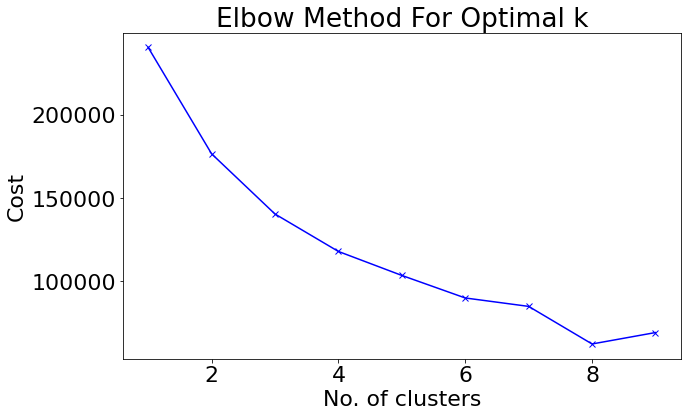

In [ ]:
'''plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
'''features_to_encode = ['ProductName' ,'ManufacturingCountry','SegmentCode','Memory','SoftwareVersion','WorkOrderCanceled','WorkOrderRur',
                    'ProblemGroup','DisplayTipo', 'DisplayTamanho','DisplayResolucao','DisplayTouchScreen','DisplayDensidadePixel','DisplayCores','DisplayVidroResistente',
                    'DisplayRecursosDisplay','DisplayRelacaoTelaCorpo','BatteryCarregador','CameraLocal_1','CameraResolucao_1','CameraAbertura_1',
                    'CameraTamanhoPixel_1','CameraFoco_1','CameraTipo_1','CameraTamanhoLente_1','CameraTamanhoSensor_1','CameraVideoResolucao_1','CameraVideoFps_1','CameraHDR_1',
                    'CameraLedFlash_1','CameraLocal_2','CameraResolucao_2','CameraAbertura_2','CameraTamanhoPixel_2','CameraFoco_2','CameraTipo_2','CameraTamanhoLente_2',
                    'CameraTamanhoSensor_2','CameraVideoResolucao_2','CameraVideoFps_2','CameraHDR_2','CameraLedFlash_2','CameraLocal_3','CameraResolucao_3','CameraAbertura_3',
                    'CameraTamanhoPixel_3','CameraFoco_3','CameraTipo_3','CameraTamanhoLente_3','CameraTamanhoSensor_3','CameraVideoResolucao_3','CameraVideoFps_3','CameraHDR_3',
                    'CameraLedFlash_3','CameraLocal_4','CameraResolucao_4','CameraAbertura_4','CameraTamanhoPixel_4','CameraFoco_4','CameraTipo_4','CameraTamanhoLente_4',
                    'CameraTamanhoSensor_4','CameraVideoResolucao_4','CameraVideoFps_4','CameraHDR_4','CameraLedFlash_4','CameraLocal_5','CameraResolucao_5','CameraAbertura_5',
                    'CameraTamanhoPixel_5','CameraFoco_5','CameraTipo_5','CameraTamanhoLente_5','CameraTamanhoSensor_5','CameraVideoResolucao_5','CameraVideoFps_5','CameraHDR_5',
                    'CameraLedFlash_5','CameraLocal_6','CameraResolucao_6','CameraAbertura_6','CameraTamanhoPixel_6','CameraFoco_6','CameraTipo_6','CameraTamanhoLente_6',
                    'CameraTamanhoSensor_6','CameraVideoResolucao_6','CameraVideoFps_6','CameraHDR_6','CameraLedFlash_6','AntenaTipo','AntenaRadio','AntenaTV','AudioVivaVoz',
                    'AudioRedutorDeRuido','AudioSaidaJack','AudioFormatoDeAudioMP3','AudioFormatoDeAudioWAV','AudioFormatoDeAudioWMA','AudioFormatoDeAudioEAAC',
                    'AudioFormatoDeAudioFLAC','BluetoothVersao','BluetoothTipoLE','BluetoothTipoA2DP','PowerOnOffHardReset','PowerOnOffBotalDigital','PowerOnOffLigarPorCarregador',
                    'SimCardSingle','SimCardTamanhoSingle','SimCardDualSim','SimCardTamanhoDualSim','SimCardTipoDualSim','SoftwareSistemaOperacional','SoftwareLinguagemWeb',
                    'SoftwareTalkBack','SoftwareVersaoKernel','SoftwareAtualizacaoFirmware']

In [ ]:
'''df2 = df.select_dtypes(exclude='number')

In [ ]:
'''df2 = df.select_dtypes(exclude='float')

In [ ]:
'''df2 = df[features_to_encode].astype(str)

In [ ]:
'''from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=6, random_state=0)
clusters = kmean.fit_predict(df)
clusters

array([3, 3, 3, ..., 3, 1, 1], dtype=int32)

In [ ]:
'''df.insert(0, "cluster_predicted", clusters, True)
df

,cluster_predicted,ProductName,ManufacturingCountry,SegmentCode,Memory,SoftwareVersion,WorkOrderCanceled,WorkOrderRur,ProblemGroup,DisplayTipo,DisplayTamanho,DisplayResolucao,DisplayTouchScreen,DisplayDensidadePixel,DisplayCores,DisplayVidroResistente,DisplayRecursosDisplay,DisplayRelacaoTelaCorpo,BatteryCarregador,CameraLocal_1,CameraResolucao_1,CameraAbertura_1,CameraTamanhoPixel_1,CameraFoco_1,CameraTipo_1,CameraTamanhoLente_1,CameraTamanhoSensor_1,CameraVideoResolucao_1,CameraVideoFps_1,CameraHDR_1,CameraLedFlash_1,CameraLocal_2,CameraResolucao_2,CameraAbertura_2,CameraTamanhoPixel_2,CameraFoco_2,CameraTipo_2,CameraTamanhoLente_2,CameraTamanhoSensor_2,CameraVideoResolucao_2,CameraVideoFps_2,CameraHDR_2,CameraLedFlash_2,CameraLocal_3,CameraResolucao_3,CameraAbertura_3,CameraTamanhoPixel_3,CameraFoco_3,CameraTipo_3,CameraTamanhoLente_3,CameraTamanhoSensor_3,CameraVideoResolucao_3,CameraVideoFps_3,CameraHDR_3,CameraLedFlash_3,CameraLocal_4,CameraResolucao_4,CameraAbertura_4,CameraTamanhoPixel_4,CameraFoco_4,CameraTipo_4,CameraTamanhoLente_4,CameraTamanhoSensor_4,CameraVideoResolucao_4,CameraVideoFps_4,CameraHDR_4,CameraLedFlash_4,CameraLocal_5,CameraResolucao_5,CameraAbertura_5,CameraTamanhoPixel_5,CameraFoco_5,CameraTipo_5,CameraTamanhoLente_5,CameraTamanhoSensor_5,CameraVideoResolucao_5,CameraVideoFps_5,CameraHDR_5,CameraLedFlash_5,CameraLocal_6,CameraResolucao_6,CameraAbertura_6,CameraTamanhoPixel_6,CameraFoco_6,CameraTipo_6,CameraTamanhoLente_6,CameraTamanhoSensor_6,CameraVideoResolucao_6,CameraVideoFps_6,CameraHDR_6,CameraLedFlash_6,AntenaTipo,AntenaRadio,AntenaTV,AudioVivaVoz,AudioRedutorDeRuido,AudioSaidaJack,AudioFormatoDeAudioMP3,AudioFormatoDeAudioWAV,AudioFormatoDeAudioWMA,AudioFormatoDeAudioEAAC,AudioFormatoDeAudioFLAC,BluetoothVersao,BluetoothTipoLE,BluetoothTipoA2DP,PowerOnOffHardReset,PowerOnOffBotalDigital,PowerOnOffLigarPorCarregador,SimCardSingle,SimCardTamanhoSingle,SimCardDualSim,SimCardTamanhoDualSim,SimCardTipoDualSim,SoftwareSistemaOperacional,SoftwareLinguagemWeb,SoftwareTalkBack,SoftwareVersaoKernel,SoftwareAtualizacaoFirmware,ActivationYear,ActivationMonth,TotalAtivado,TotalFalhas,TotalProduzido,PercentualFalhas
0,3,3,0,0,3,76,0,0,3,1,0,1,0,2,0,0,0,0,3,0,1,0,1,0,0,1,2,0,0,0,0,1,2,0,1,1,1,0,2,0,1,0,1,0,0,2,3,0,0,0,0,0,2,0,0,1,1,2,2,0,3,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,2,0,2020,9,407,44,37,10.81
1,3,3,0,0,3,76,0,0,8,1,0,1,0,2,0,0,0,0,3,0,1,0,1,0,0,1,2,0,0,0,0,1,2,0,1,1,1,0,2,0,1,0,1,0,0,2,3,0,0,0,0,0,2,0,0,1,1,2,2,0,3,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,2,0,2020,9,407,11,37,2.70
2,3,3,0,0,3,72,0,0,4,1,0,1,0,2,0,0,0,0,3,0,1,0,1,0,0,1,2,0,0,0,0,1,2,0,1,1,1,0,2,0,1,0,1,0,0,2,3,0,0,0,0,0,2,0,0,1,1,2,2,0,3,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,2,0,2020,9,407,44,37,10.81
3,3,3,0,0,3,39,0,0,5,1,0,1,0,2,0,0,0,0,3,0,1,0,1,0,0,1,2,0,0,0,0,1,2,0,1,1,1,0,2,0,1,0,1,0,0,2,3,0,0,0,0,0,2,0,0,1,1,2,2,0,3,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,2,0,2020,9,407,55,37,13.51
4,3,3,0,0,3,76,0,0,7,1,0,1,0,2,0,0,0,0,3,0,1,0,1,0,0,1,2,0,0,0,0,1,2,0,1,1,1,0,2,0,1,0,1,0,0,2,3,0,0,0,0,0,2,0,0,1,1,2,2,0,3,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,2,0,2020,9,407,55,37,13.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,3,0,0,9,2

In [ ]:
# Building the model with the best K clusters
# init = random, Huang, Cao
#kmode = KModes(n_clusters= 8, init = "random", n_init = 5, verbose=1)
#clusters = kmode.fit_predict(df2)
#clusters

In [ ]:
'''df.insert(0, "cluster_predicted", clusters, True)
df

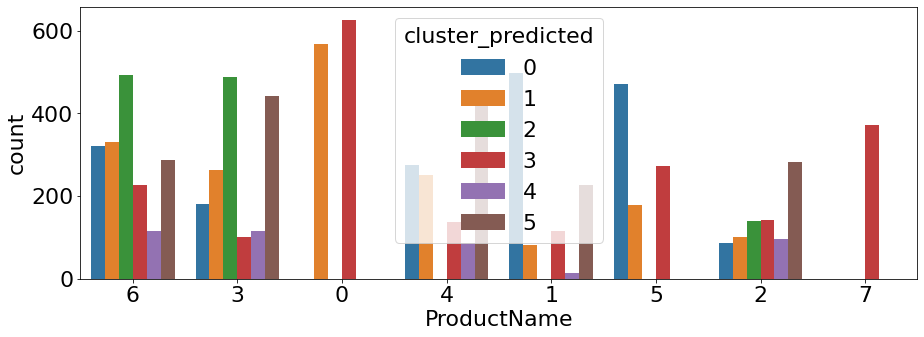

In [ ]:
'''plt.subplots(figsize = (15,5))
sns.countplot(x=df['ProductName'],order=df['ProductName'].value_counts().index,hue=df['cluster_predicted'])
plt.show()

## 6. Creation of Datasets and Normalization


In [ ]:
#X_mpg = df.drop(columns=['PercentualFalhas'])
#y_mpg = df['PercentualFalhas']

In [ ]:
df[['PercentualFalhas', 'TotalFalhas','TotalAtivado', 'TotalProduzido']]

,PercentualFalhas,TotalFalhas,TotalAtivado,TotalProduzido
0,21.62,88,407,37
1,13.51,55,407,37
2,13.51,55,407,37
3,3.54,198,5588,508
4,5.91,330,5588,508
...,...,...,...,...
9695,7.59,396,5216,2633
9696,33.15,1410,4254,2154
9697,10.91,646,5922,2993
9698,0.03,2,5922,2993


In [ ]:
features_to_scale = ['PercentualFalhas', 'TotalFalhas','TotalAtivado', 'TotalProduzido']

In [ ]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

for x in features_to_scale:
  var = df[x].values.reshape(-1, 1) #returns a numpy array
  x_scaled = min_max_scaler.fit_transform(var)
  df[x] = x_scaled

In [ ]:
df[['PercentualFalhas', 'TotalFalhas','TotalAtivado', 'TotalProduzido']]

,PercentualFalhas,TotalFalhas,TotalAtivado,TotalProduzido
0,0.215965,0.005936,0.014595,0.012032
1,0.134840,0.003658,0.014595,0.012032
2,0.134840,0.003658,0.014595,0.012032
3,0.035111,0.013528,0.204111,0.169452
4,0.058818,0.022639,0.204111,0.169452
...,...,...,...,...
9695,0.075623,0.027195,0.190504,0.879679
9696,0.331299,0.097184,0.155315,0.719586
9697,0.108833,0.044451,0.216329,1.000000
9698,0.000000,0.000000,0.216329,1.000000


In [ ]:
# O valor a ser previsto
target = np.array (df ['PercentualFalhas'])

# Removendo variável target 
features = df.drop ('PercentualFalhas', axis = 1)

# Salvando nomes de recursos para uso 
feature_list = list (features.columns)

# Conversão em numpy array 
features = np.array (features)

In [ ]:
target

array([0.21596479, 0.13484045, 0.13484045, ..., 0.10883265, 0.        ,
       0.06491948])

In [ ]:
features

array([[3.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45950691e-02, 5.93594699e-03, 1.20320856e-02],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45950691e-02, 3.65819989e-03, 1.20320856e-02],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45950691e-02, 3.65819989e-03, 1.20320856e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.00000000e+00, ...,
        2.16328919e-01, 4.44505798e-02, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.00000000e+00, ...,
        2.16328919e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.00000000e+00, ...,
        2.16328919e-01, 2.65046935e-02, 1.00000000e+00]])

In [ ]:
xtreino, xteste, ytreino, yteste = train_test_split (features, target, test_size = 0.25, random_state = 42)

In [ ]:
xtreino.shape

(7275, 122)

In [ ]:
ytreino.shape

(7275,)

In [ ]:
xteste.shape

(2425, 122)

In [ ]:
yteste.shape

(2425,)




## 7. Models

### LGBM

In [ ]:
'''def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result''' 

In [ ]:
'''# Training LGB
pred_test, model, evals_result = run_lgb(X_mpg_train, y_mpg_train, X_mpg_test,  y_mpg_test)
print("LightGBM Training Completed...")'''

In [ ]:
'''# feature importance
print("Features Importance...")
gain = model.feature_importance('gain')
featureimp = pd.DataFrame({'feature':model.feature_name(), 
                   'split':model.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(featureimp[:50])'''

#### Tunning Test

In [ ]:
regressor_lgbm = lgb.LGBMRegressor()

cross_val_score(regressor_lgbm, xtreino, ytreino, scoring='neg_root_mean_squared_error').mean()

-1.55028912697124

In [ ]:
regressor_lgbm_max_depth = lgb.LGBMRegressor(max_depth=2)

cross_val_score(regressor_lgbm_max_depth, xtreino, ytreino, scoring='neg_root_mean_squared_error').mean()

-2.7084268276322017

In [ ]:
regressor_lgbm_dart = lgb.LGBMRegressor(boosting_type='dart')

cross_val_score(regressor_lgbm_dart, xtreino, ytreino, scoring='neg_root_mean_squared_error').mean()

-2.4239565615557357

In [ ]:
regressor_campeao = regressor_lgbm

In [ ]:
regressor_campeao.fit(xtreino, ytreino, eval_metric='root_mean_squared_error')

LGBMRegressor()

In [ ]:
predicoes_mpg = regressor_campeao.predict(xteste)
predicoes_mpg = pd.DataFrame(predicoes_mpg)
predicoes_mpg.rename(columns={0: 'Predicao'}, inplace=True)
predicoes_mpg['Predicao'] = round(predicoes_mpg['Predicao'],2)

predicoes_mpg.head(10)

,Predicao
0,0.96
1,9.13
2,6.67
3,1.35
4,13.13
5,16.87
6,1.51
7,11.20
8,5.83
9,6.78


In [ ]:
yteste = pd.DataFrame(yteste)
yteste.head(10)

,PercentualFalhas
3969,0.90
6433,9.39
6358,6.85
221,1.44
8225,14.29
3934,16.96
7171,1.55
5741,12.01
1374,6.05
7754,6.62


In [ ]:
sns.distplot((yteste-predicoes_mpg),bins=50)

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE:", metrics.mean_absolute_error(yteste, predicoes_mpg))
print('MSE:', metrics.mean_squared_error(yteste, predicoes_mpg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yteste, predicoes_mpg)))

MAE: 0.3460553790285974
MSE: 3.7935282796187018
RMSE: 1.9476982003428307


### Random Forest


In [ ]:
#Grid
#Primeiro é criado uma grade de parâmetros para amostra durante o ajuste
from sklearn.model_selection import RandomizedSearchCV

# Número de árvores na floresta aleatória 
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']
# Número máximo de níveis na árvore 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de amostras necessárias para dividir um nó 
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada nó folha 
min_samples_leaf = [1, 2, 4]
# Método de seleção de amostras para treinar cada árvore 
bootstrap = [True, False]


# Grid aleatório
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [500, 666, 833, 1000, 1166, 1333, 1500, 1666, 1833, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
#Treinamento do modelo

# Criação do modelo 
rf = RandomForestRegressor () 

# O Grid aleatório é usado para pesquisar os melhores hiperparâmetros 
# Após criado o modelo é realizada uma pesquisa aleatória de parâmetros utilizando validação cruzada de 3 dobras
# Onde são 100 combinações diferentes usando os núcleos disponíveis 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Ajustando o modelo com o Grid
rf_random.fit (xtreino, ytreino)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 666, 833, 1000,
                                                         1166, 1333, 1500, 1666,
                                                         1833, 2000]},
                   random_state=42, verbose=2)

In [ ]:
#Análise dos melhores parêmetros
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
#Avaliação e Teste do Modelo

#teste de predição com conjunto separado para teste
predictions = rf_random.predict(xteste)
# Cálculo do erro absoluto
errors = abs(predictions - yteste)
# Erro absoluto médio (MAE)
print('Média do erro absoluto:', round(np.mean(errors), 2), 'graus.')

from math import sqrt
from sklearn.metrics import mean_squared_error
# Erro quadrático médio (MSE)
print('Erro quadrático médio:', round(mean_squared_error(yteste, predictions), 2), 'graus.')

Média do erro absoluto: 0.0 graus.
Erro quadrático médio: 0.0 graus.


In [ ]:
#Avaliação e Teste do Modelo

#teste de predição com conjunto separado para teste
predictions = rf_random.predict(xteste)
# Cálculo do erro absoluto
errors = abs(predictions - yteste)
# Erro absoluto médio (MAE)
print('Média do erro absoluto:', round(np.mean(errors), 2), 'graus.')

# Erro quadrático médio (MSE)
print('Erro quadrático médio:', round(mean_squared_error(yteste, predictions), 2), 'graus.')

Média do erro absoluto: 0.0 graus.
Erro quadrático médio: 0.0 graus.


In [ ]:
#Avaliação e Teste do Modelo

#teste de predição com conjunto separado para teste
predictions = rf_random.predict(xteste)
# Cálculo do erro absoluto
errors = abs(predictions - yteste)
# Erro absoluto médio (MAE)
print('Média do erro absoluto:', round(np.mean(errors), 2), 'graus.')

# Erro quadrático médio (MSE)
print('Erro quadrático médio:', round(mean_squared_error(yteste, predictions), 2), 'graus.')

Média do erro absoluto: 0.0 graus.
Erro quadrático médio: 0.0 graus.


In [ ]:
predict = rf_random.predict(xteste)
predict = pd.DataFrame(predict)
predict.rename(columns={0: 'Predicao'}, inplace=True)
predict['Predicao'] = round(predict['Predicao'],2)
predict['real' ] = yteste

predict.head(10)

,Predicao,real
0,0.16,0.163449
1,0.06,0.061518
2,0.21,0.207562
3,0.10,0.097729
4,0.26,0.262479
5,0.07,0.069921
6,0.08,0.074722
7,0.09,0.094928
8,0.09,0.090627
9,0.05,0.047914


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



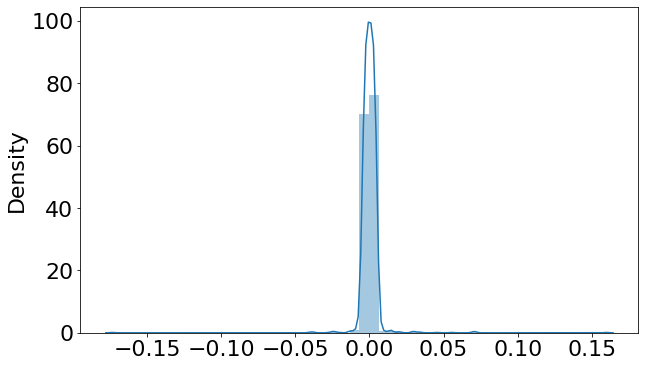

In [ ]:
sns.distplot((predict['real']-predict['Predicao']),bins=50)

In [ ]:
print("MAE:", metrics.mean_absolute_error(predict['real'], predict['Predicao']))
print('MSE:', metrics.mean_squared_error(predict['real'], predict['Predicao']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(predict['real'], predict['Predicao'])))

MAE: 0.003067375882867955
MSE: 4.928992615093741e-05
RMSE: 0.007020678467992777


In [ ]:
# salvar modelo
import pickle
# salvar o modelo XGBoost (xgb_model) no arquivo sale_xgboost.pkl
with open('rf_random.pkl', 'wb') as file:
    pickle.dump(rf_random, file)

### XGBoost


In [ ]:
# Número de árvores na floresta aleatória 
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']
# Número máximo de níveis na árvore 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de amostras necessárias para dividir um nó 
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada nó folha 
min_samples_leaf = [1, 2, 4]
# Método de seleção de amostras para treinar cada árvore 
bootstrap = [True, False]


# Grid aleatório
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
'''params = { 'max_depth': [6,10,50], #Maximum tree depth for base learners
           'learning_rate': [0.01, 0.02, 0.05], #Boosting learning rate
           'n_estimators': [100, 500, 1000], #Number of gradient boosted trees. Equivalent to number of boosting rounds
           'colsample_bytree': [0.7, 1.0]} #Subsample ratio of columns when constructing each tree'''

xgb_reg = xgb.XGBRegressor(seed=20)

xgb_grid = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=2)

xgb_grid.fit(x_train,y_train)

In [ ]:
#Treinamento do modelo

# Criação do modelo 
rf = RandomForestRegressor () 

# O Grid aleatório é usado para pesquisar os melhores hiperparâmetros 
# Após criado o modelo é realizada uma pesquisa aleatória de parâmetros utilizando validação cruzada de 3 dobras
# Onde são 100 combinações diferentes usando os núcleos disponíveis 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Ajustando o modelo com o Grid
rf_random.fit (xtreino, ytreino)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 666, 833, 1000,
                                                         1166, 1333, 1500, 1666,
                                                         1833, 2000]},
                   random_state=42, verbose=2)

In [ ]:
#Análise dos melhores parêmetros
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [ ]:
#Avaliação e Teste do Modelo

#teste de predição com conjunto separado para teste
predictions = rf_random.predict(xteste)
# Cálculo do erro absoluto
errors = abs(predictions - yteste)
# Erro absoluto médio (MAE)
print('Média do erro absoluto:', round(np.mean(errors), 2), 'graus.')

from math import sqrt
from sklearn.metrics import mean_squared_error
# Erro quadrático médio (MSE)
print('Erro quadrático médio:', round(mean_squared_error(yteste, predictions), 2), 'graus.')

Média do erro absoluto: 0.0 graus.
Erro quadrático médio: 0.0 graus.


In [ ]:
#Avaliação e Teste do Modelo

#teste de predição com conjunto separado para teste
predictions = rf_random.predict(xteste)
# Cálculo do erro absoluto
errors = abs(predictions - yteste)
# Erro absoluto médio (MAE)
print('Média do erro absoluto:', round(np.mean(errors), 2), 'graus.')

# Erro quadrático médio (MSE)
print('Erro quadrático médio:', round(mean_squared_error(yteste, predictions), 2), 'graus.')

Média do erro absoluto: 0.0 graus.
Erro quadrático médio: 0.0 graus.


In [ ]:
#Avaliação e Teste do Modelo

#teste de predição com conjunto separado para teste
predictions = rf_random.predict(xteste)
# Cálculo do erro absoluto
errors = abs(predictions - yteste)
# Erro absoluto médio (MAE)
print('Média do erro absoluto:', round(np.mean(errors), 2), 'graus.')

# Erro quadrático médio (MSE)
print('Erro quadrático médio:', round(mean_squared_error(yteste, predictions), 2), 'graus.')

Média do erro absoluto: 0.0 graus.
Erro quadrático médio: 0.0 graus.


In [ ]:
predict = rf_random.predict(xteste)
predict = pd.DataFrame(predict)
predict.rename(columns={0: 'Predicao'}, inplace=True)
predict['Predicao'] = round(predict['Predicao'],2)
predict['real' ] = yteste

predict.head(10)

,Predicao,real
0,0.16,0.163449
1,0.06,0.061518
2,0.21,0.207562
3,0.10,0.097729
4,0.26,0.262479
5,0.07,0.069921
6,0.08,0.074722
7,0.09,0.094928
8,0.09,0.090627
9,0.05,0.047914


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



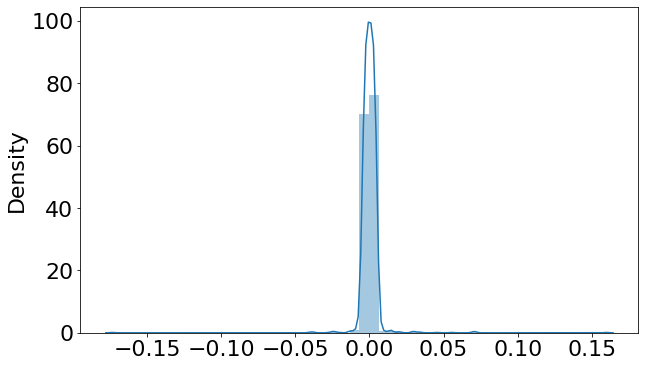

In [ ]:
sns.distplot((predict['real']-predict['Predicao']),bins=50)

In [ ]:
print("MAE:", metrics.mean_absolute_error(predict['real'], predict['Predicao']))
print('MSE:', metrics.mean_squared_error(predict['real'], predict['Predicao']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(predict['real'], predict['Predicao'])))

MAE: 0.003067375882867955
MSE: 4.928992615093741e-05
RMSE: 0.007020678467992777


In [ ]:
# salvar modelo
import pickle
# salvar o modelo XGBoost (xgb_model) no arquivo sale_xgboost.pkl
with open('rf_random.pkl', 'wb') as file:
    pickle.dump(rf_random, file)